# Web Scraping Mini Project

by Himani Anil Deshpande

## Project Idea:
I am scraping data to find Books that were released for the past one year (i.e 2021). I will be focussing on List of YA Novels of 2021 on goodreads website.(https://www.goodreads.com/list/show/113013.YA_Novels_of_2021)
I am scraping for the all the 9 pages with total 807 books listed. 

I will be scraping for the below fields using BeautifulSoup



*   Book Titile
*   Author
*   Average Rating


*   Total Ratings( All Ratings)



*   People Voted


*   Score
*   Author URL


*   Book URL
*   Image URL



I will vizualizse the data to find the top 10 Books and Authors accoridng to their Ratings and Votes. Also show the Books and Authors which are most Rated, Voted and Scored.

Applications:
The Data will help in analsing the type of books that young adults are interested in reading. And based on other users ratings and votes these books can be recommended to similar demographics. This Data can be used for building a Book Recommender system 



Importing Libraries

In [24]:

from bs4 import BeautifulSoup
from dateutil.parser import parse
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt


In [2]:
base_url = "https://www.goodreads.com/list/show/113013.YA_Novels_of_2021"


Getting all the URL's which will be used for scarping 

In [3]:
all_6_urls = [base_url]
for i in range(2,10):
    all_6_urls.append(base_url+"?page="+str(i))
    

In [4]:
all_6_urls

['https://www.goodreads.com/list/show/113013.YA_Novels_of_2021',
 'https://www.goodreads.com/list/show/113013.YA_Novels_of_2021?page=2',
 'https://www.goodreads.com/list/show/113013.YA_Novels_of_2021?page=3',
 'https://www.goodreads.com/list/show/113013.YA_Novels_of_2021?page=4',
 'https://www.goodreads.com/list/show/113013.YA_Novels_of_2021?page=5',
 'https://www.goodreads.com/list/show/113013.YA_Novels_of_2021?page=6',
 'https://www.goodreads.com/list/show/113013.YA_Novels_of_2021?page=7',
 'https://www.goodreads.com/list/show/113013.YA_Novels_of_2021?page=8',
 'https://www.goodreads.com/list/show/113013.YA_Novels_of_2021?page=9']

Function to get the Book URL as well as Image URL

In [5]:
def getBookDetails(book_detail):
  all_book_url,  all_image_url = [],[]

  for detail in book_detail:
        
        all_book_url.append(detail.find("a").get('href').strip())
        all_image_url.append(detail.find("img").get('src').strip())
    

  return all_book_url,  all_image_url

Function to get Book Titles

In [6]:
def getTitle(book_title):
    
    all_title = []
    for title in book_title:
        title_text = title.find("span").get_text().strip()
        all_title.append(title_text)
    
    return all_title

Function to get Authors' Name, URL

In [7]:
def getAuthorDetails(author_details):
  all_author_url, all_author = [], [] 
  for detail in author_details:
    author_name = detail.find("span").get_text().strip()
    author_url = detail.get("href").strip()
    all_author_url.append(author_url)
    all_author.append(author_name)

  return all_author_url, all_author

Function to get Avergae Ratings and All Ratings, which is the number of people contributed to get the avergae rating

In [8]:
def getRaitingDetails(ratings_details):
  all_avg_ratings, all_ratings = [], []
  for detail in ratings_details:
    ratings_name = detail.get_text().strip()
    ratings = re.sub(r"[a-zA-Z,]+", "", ratings_name).strip().split()
    all_avg_ratings.append(ratings[0])
    all_ratings.append(ratings[-1])

  return  all_avg_ratings, all_ratings

Function to get Scores and Votes

In [9]:
def  getScoreDetails(score_details):
  all_scores, all_votes  = [], [] 
  for detail in score_details:
    anchors = detail.find_all("a")
    score = re.sub(r"[a-zA-Z,:]+", "", anchors[0].get_text().strip()).strip()
    votes = anchors[1].get_text().strip()
    all_votes.append(re.findall(r'\d+',votes)[0])
    all_scores.append(score)

  return all_scores, all_votes

Base Function which is scraping the data from Goodreads 

In [10]:
def get_data(all_6_urls):
  all_title = []
  all_author = []
  all_avg_ratings = []
  all_ratings = []
  all_votes =[]
  all_scores = []
  all_image_url = []
  all_book_url = []
  all_author_url = []

  final_bookdf =  pd.DataFrame({
      
    "Title": all_title,
    "Author": all_author,
    "Avg_Rating": all_avg_ratings,
    "All_Ratings" : all_ratings,
    "Votes": all_votes,
    "Scores": all_scores,
    "Image_Url": all_image_url,
    "Book_Url": all_book_url,
    "Author_Url": all_author_url
  })

  

  for url in all_6_urls:
    page = requests.get(url)
    soup = BeautifulSoup(page.content, 'html.parser')

   
    books_table  = soup.find_all("div", {"id": "all_votes"})
    
    book_details = soup.find_all("div", {"class":  "js-tooltipTrigger tooltipTrigger"})
   
    book_title = soup.find_all("a", {"class":  "bookTitle"})
    
    author_details =  soup.find_all("a", {"class": "authorName"})
       
    ratings_details = soup.find_all("span", "minirating")

    score_details = soup.find_all("span", {"class":  "smallText uitext"})


    all_book_url,  all_image_url = getBookDetails(book_details)
  
    all_title = getTitle(book_title)
    
    all_author_url, all_author = getAuthorDetails(author_details)

    all_avg_ratings, all_ratings = getRaitingDetails(ratings_details)
 
    all_scores, all_votes = getScoreDetails(score_details)

    bookdf =  pd.DataFrame({
      
    "Title": all_title,
    "Author": all_author,
    "Avg_Rating": all_avg_ratings,
    "All_Ratings" : all_ratings,
    "Votes": all_votes,
    "Scores": all_scores,
    "Image_Url": all_image_url,
    "Book_Url": all_book_url,
    "Author_Url": all_author_url
  })
    final_bookdf = pd.concat([final_bookdf,bookdf])
   
  return final_bookdf

  

In [11]:

books_df = get_data(all_6_urls)

In [12]:

books_df.shape

(807, 9)

In [13]:
books_df

,Title,Author,Avg_Rating,All_Ratings,Votes,Scores,Image_Url,Book_Url,Author_Url
0,"Rule of Wolves (King of Scars, #2)",Leigh Bardugo,4.41,85354,391,38340,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/36307674-rule-of-wolves,https://www.goodreads.com/author/show/4575289....
1,"Chain of Iron (The Last Hours, #2)",Cassandra Clare,4.47,47280,291,28446,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/17699855-chain-of-iron,https://www.goodreads.com/author/show/150038.C...
2,Lore,Alexandra Bracken,3.82,52885,222,21293,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53375824-lore,https://www.goodreads.com/author/show/2973783....
3,"We Free the Stars (Sands of Arawiya, #2)",Hafsah Faizal,4.31,19622,203,19901,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/46223364-we-free-the-stars,https://www.goodreads.com/author/show/17276299...
4,"Wings of Ebony (Wings of Ebony, #1)",J. Elle,3.92,3626,172,16749,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/54304072-wings-of-ebony,https://www.goodreads.com/author/show/19322069...
...,...,...,...,...,...,...,...,...,...
2,My Last Summer with Cass,Mark Crilley,3.80,1009,1,23,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/55102443-my-last-summer-with-cass,https://www.goodreads.com/author/show/36452.Ma...
3,Origin Story,Eric Smith,0.00,0,1,21,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/50860279-origin-story,https://www.goodreads.com/author/show/3435685....
4,Summer in the City of Roses,Michelle Ruiz Keil,3.75,245,1,19,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/56253675-summer-in-the-city-of-roses,https://www.goodreads.com/author/show/18044547...
5,The Deep-Sea Duke (The Watchmaker and the Duke...,Lauren James,4.06,108,1,9,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/51021935-the-deep-sea-duke,https://www.goodreads.com/author/show/8596769....


In [14]:
books_df.describe()

,Title,Author,Avg_Rating,All_Ratings,Votes,Scores,Image_Url,Book_Url,Author_Url
count,807,807,807,807,807,807,807,807,807
unique,805,753,154,637,86,531,780,807,753
top,Untitled,Ellie Aiden,5.00,0,1,100,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/36307674-rule-of-wolves,https://www.goodreads.com/author/show/20522959...
freq,3,7,17,14,225,63,28,1,7


In [15]:
books_df.head()

,Title,Author,Avg_Rating,All_Ratings,Votes,Scores,Image_Url,Book_Url,Author_Url
0,"Rule of Wolves (King of Scars, #2)",Leigh Bardugo,4.41,85354,391,38340,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/36307674-rule-of-wolves,https://www.goodreads.com/author/show/4575289....
1,"Chain of Iron (The Last Hours, #2)",Cassandra Clare,4.47,47280,291,28446,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/17699855-chain-of-iron,https://www.goodreads.com/author/show/150038.C...
2,Lore,Alexandra Bracken,3.82,52885,222,21293,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53375824-lore,https://www.goodreads.com/author/show/2973783....
3,"We Free the Stars (Sands of Arawiya, #2)",Hafsah Faizal,4.31,19622,203,19901,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/46223364-we-free-the-stars,https://www.goodreads.com/author/show/17276299...
4,"Wings of Ebony (Wings of Ebony, #1)",J. Elle,3.92,3626,172,16749,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/54304072-wings-of-ebony,https://www.goodreads.com/author/show/19322069...


Storing the Original Scraped Data to a CSV File

In [16]:
books_df.to_csv("Goodreads_Scraped_Books.csv")

In [17]:
books_df.dtypes

Title          object
Author         object
Avg_Rating     object
All_Ratings    object
Votes          object
Scores         object
Image_Url      object
Book_Url       object
Author_Url     object
dtype: object

In [18]:
# replace_comma = lambda x : x.replace(',','')

Changing the Data types of few numerical columns

In [19]:
books_df = books_df.astype({"Avg_Rating": float,"All_Ratings":float,"Votes":float, "Scores":float  }, errors='raise') 



In [20]:

books_df.dtypes

Title           object
Author          object
Avg_Rating     float64
All_Ratings    float64
Votes          float64
Scores         float64
Image_Url       object
Book_Url        object
Author_Url      object
dtype: object

# Vizualizations

## Top 15 Books with highest Avg Ratings

In [21]:
book_avg_ratings = books_df.nlargest(15, ["Avg_Rating"])

In [69]:
book_avg_ratings["Book"] = book_avg_ratings['Title'] + " " +book_avg_ratings['Author']

In [70]:
book_avg_ratings

,Title,Author,Avg_Rating,All_Ratings,Votes,Scores,Image_Url,Book_Url,Author_Url,Book
87,"Moon and Dawn (Sandcastle, #0.5)",Fatih Turgut,5.0,5.0,3.0,285.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/36111802-moon-and-dawn,https://www.goodreads.com/author/show/17120246...,"Moon and Dawn (Sandcastle, #0.5) Fatih Turgut"
52,"Strange Worlds (Jensen in the Multiverse, #1)",Hailey Gonzales,5.0,4.0,2.0,200.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/59139381-strange-worlds,https://www.goodreads.com/author/show/14952086...,"Strange Worlds (Jensen in the Multiverse, #1) ..."
9,Ghost Notes,Antoine Revoy,5.0,1.0,3.0,168.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/51076297-ghost-notes,https://www.goodreads.com/author/show/3405358....,Ghost Notes Antoine Revoy
70,The Space Between Loneliness and Fear,Jennifer Mason-Black,5.0,2.0,2.0,106.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/48902636-the-space-between-loneline...,https://www.goodreads.com/author/show/5860277....,The Space Between Loneliness and Fear Jennifer...
81,Witched Up (Villin Book 1),Lili Jade,5.0,4.0,1.0,100.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/57353017-witched-up,https://www.goodreads.com/author/show/21261339...,Witched Up (Villin Book 1) Lili Jade
83,Perspective Makes a Monster : Part One (On Cyc...,Two Upright Bears,5.0,1.0,1.0,100.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/57333947-perspective-makes-a-monster,https://www.goodreads.com/author/show/21255148...,Perspective Makes a Monster : Part One (On Cyc...
87,"The Warder (Blood Gift Chronicles, #2)",Susie Williamson,5.0,4.0,1.0,100.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/57460811-the-warder,https://www.goodreads.com/author/show/18616806...,"The Warder (Blood Gift Chronicles, #2) Susie W..."
5,Theory of Reality: Part 1,Eli Mendoza,5.0,2.0,1.0,100.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/58418911-theory-of-reality,https://www.goodreads.com/author/show/21615507...,Theory of Reality: Part 1 Eli Mendoza
20,"Better Luck This Time (The Half Theft, #2)",Brooke Nelson,5.0,2.0,1.0,100.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/58900520-better-luck-this-time,https://www.goodreads.com/author/show/20777044...,"Better Luck This Time (The Half Theft, #2) Bro..."
28,Were-Dinosaurs: Concerto of Doom,S.B. Clark,5.0,1.0,1.0,100.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/59855414-were-dinosaurs,https://www.goodreads.com/author/show/21132557...,Were-Dinosaurs: Concerto of Doom S.B. Clark


Text(0, 0.5, 'Book')

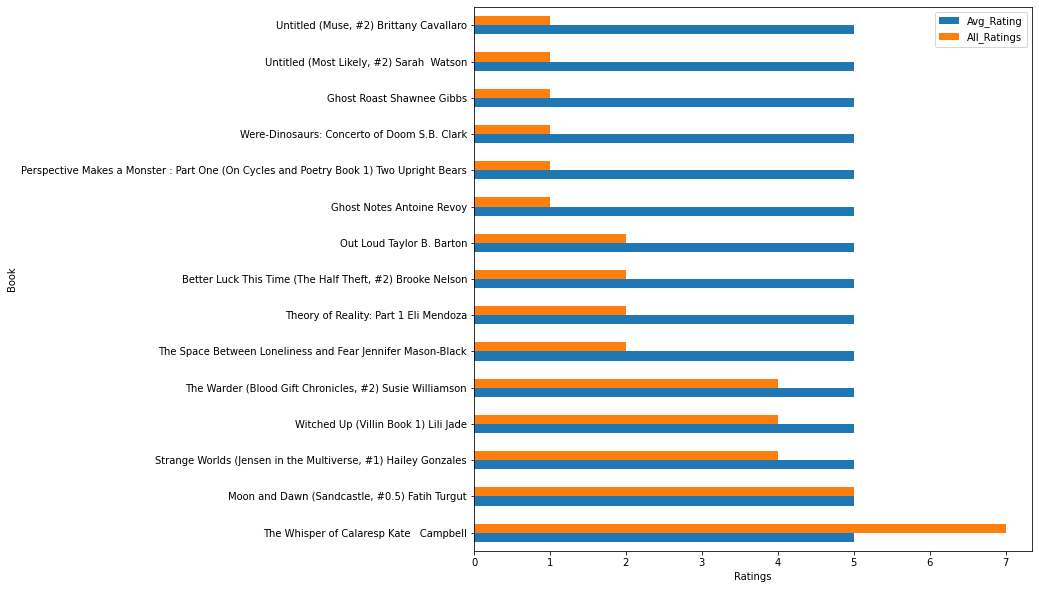

In [76]:
book_avg_ratings.sort_values(by='All_Ratings',ascending=False).plot(y=["Avg_Rating","All_Ratings"], x="Book", kind="barh",  figsize=(10, 10))
plt.xlabel('Ratings')
plt.ylabel("Book")

We can see that the top 15 Books according to highest ratings in scale of 1 to 5 are at 5. I have added All_Ratings which is the number of people which have contribute to the ratings. It shows that the book "The Whisper of Calaresp" by Kate Campbell and "Moon and Dawn (Sandcastle, #0.5)" by Faith Turgut are the books which were rated by 7 and 5 people repectively to get a rating of 5.0 and 1 people have rated the books like "Ghost Notes" by Antoine Revoy and "Ghost Roast" by Shwanee Gibbs at scale of 5.0. 

It shows that some novels were rated by more number of people than others to reach the "5.0" scale.

## Top 15 Books with Highest Ratings

In [26]:
books_highest_ratings = books_df.nlargest(15, ["All_Ratings"])

In [67]:
books_highest_ratings["Book"] = books_highest_ratings['Title'] + " " +books_highest_ratings['Author']

In [68]:
books_highest_ratings

,Title,Author,Avg_Rating,All_Ratings,Votes,Scores,Image_Url,Book_Url,Author_Url,Book
26,"Shatter Me (Shatter Me, #1)",Tahereh Mafi,3.92,435166.0,1.0,100.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/10429045-shatter-me,https://www.goodreads.com/author/show/4637539....,"Shatter Me (Shatter Me, #1) Tahereh Mafi"
32,"Heartstopper: Volume Three (Heartstopper, #3)",Alice Oseman,4.62,149747.0,8.0,708.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/44779280-heartstopper,https://www.goodreads.com/author/show/7789423....,"Heartstopper: Volume Three (Heartstopper, #3) ..."
10,"Heartstopper: Volume Four (Heartstopper, #4)",Alice Oseman,4.67,107877.0,133.0,12844.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/51574372-heartstopper,https://www.goodreads.com/author/show/7789423....,"Heartstopper: Volume Four (Heartstopper, #4) A..."
78,A Deadly Education (The Scholomance #1),Naomi Novik,4.02,86561.0,3.0,293.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/50548197-a-deadly-education,https://www.goodreads.com/author/show/8730.Nao...,A Deadly Education (The Scholomance #1) Naomi ...
0,"Rule of Wolves (King of Scars, #2)",Leigh Bardugo,4.41,85354.0,391.0,38340.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/36307674-rule-of-wolves,https://www.goodreads.com/author/show/4575289....,"Rule of Wolves (King of Scars, #2) Leigh Bardugo"
21,"The Hawthorne Legacy (The Inheritance Games, #2)",Jennifer Lynn Barnes,4.24,78255.0,80.0,7470.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/50531218-the-hawthorne-legacy,https://www.goodreads.com/author/show/164187.J...,"The Hawthorne Legacy (The Inheritance Games, #..."
33,Firekeeper's Daughter,Angeline Boulley,4.39,65044.0,63.0,5696.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/52346471-firekeeper-s-daughter,https://www.goodreads.com/author/show/19633027...,Firekeeper's Daughter Angeline Boulley
14,"Kingdom of the Cursed (Kingdom of the Wicked, #2)",Kerri Maniscalco,4.26,54446.0,11.0,777.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/52772417-kingdom-of-the-cursed,https://www.goodreads.com/author/show/14584166...,"Kingdom of the Cursed (Kingdom of the Wicked, ..."
2,Lore,Alexandra Bracken,3.82,52885.0,222.0,21293.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53375824-lore,https://www.goodreads.com/author/show/2973783....,Lore Alexandra Bracken
27,"The Trials of Morrigan Crow (Nevermoor, #1)",Jessica Townsend,4.34,49339.0,1.0,100.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/34219873-the-trials-of-morrigan-crow,https://www.goodreads.com/author/show/16727429...,"The Trials of Morrigan Crow (Nevermoor, #1) Je..."


Text(0, 0.5, 'Book')

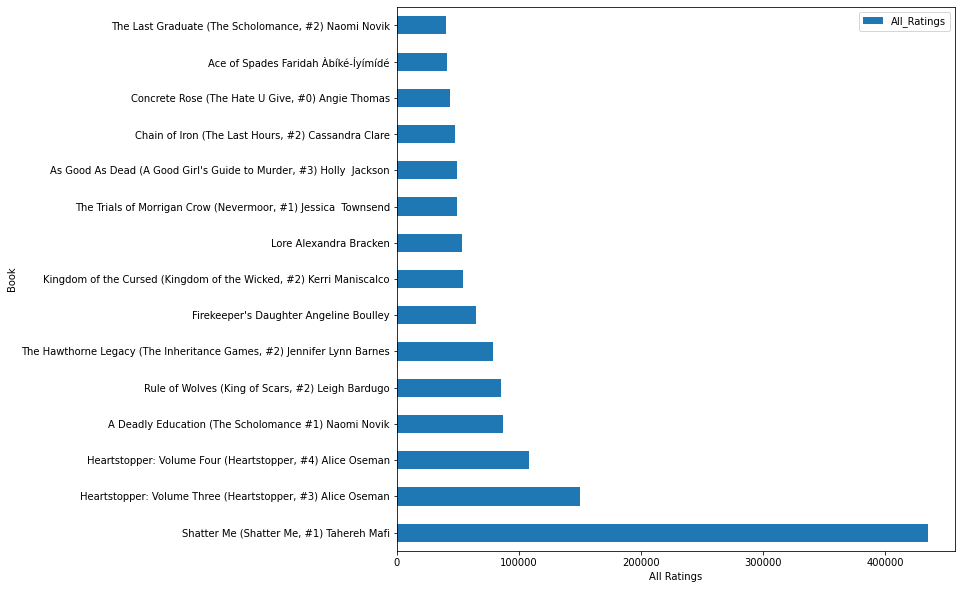

In [66]:
books_highest_ratings.plot(y="All_Ratings", x="Book", kind="barh",  figsize=(10, 10))
plt.xlabel('All Ratings')
plt.ylabel("Book")

The above viszualization shows the Books which were rated by the largest number of people on the scale of 1 to 5. We can see that "Shatter Me (Shatter Me, #1)" by Tahereh MAfi was most rated with about 434973 number of people but the avergae rating of the book is still 3.92 and here is a significant drop for the 2nd book "Heartstopper: Volume three (Heatstopper, #3)" by Alice Oseman which was rated by 148242 people with an avergae rating of 4.62.


We can see that "Rule of Wolves ( King of Scars, #2) by Leigh Bardugo" is 5th in position 85354 people rating for it to be at an average rating of 4.41

Its shows that even if the novel is rated by larger population it doesnt necessarily has good average ratings due to diversity of opinions.

## Top 15 Prolific Authors of 2021 with YA Novels

In [29]:
books_df['Author'].value_counts()

Ellie Aiden           7
Christina Bauer       5
Lynette Noni          3
Tahereh Mafi          3
Selina R. Gonzalez    3
                     ..
Jesse Q. Sutanto      1
Rebecca Kim Wells     1
Michelle I. Mason     1
Julie Halpern         1
Lisi Harrison         1
Name: Author, Length: 753, dtype: int64

Text(0, 0.5, 'Authors')

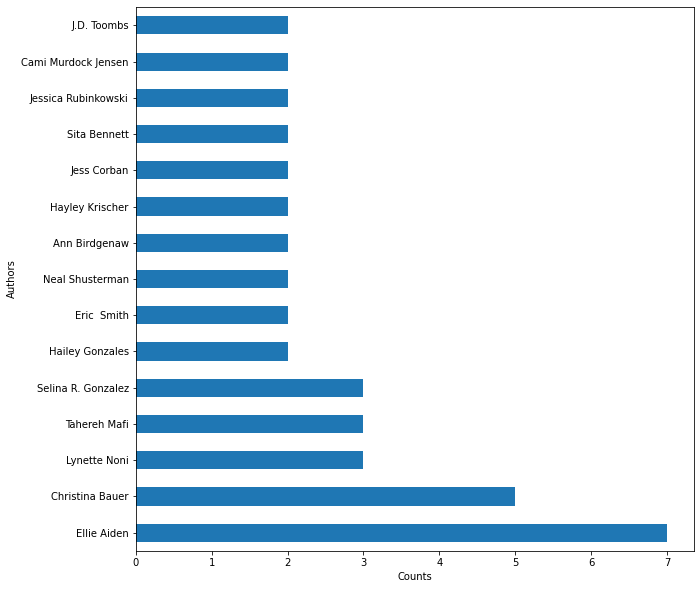

In [30]:
books_df['Author'].value_counts().nlargest(15).plot(kind='barh', figsize=(10, 10))
plt.xlabel('Counts')
plt.ylabel("Authors")

The above vizualization shows the Authors and the number of Books they have published/released in the year of 2021. We can see that author "Ellie Aiden" has published whopping 7 books in that particular year and author Christina Bauer has released 5 books in the same year. 

## Histogram of Avgerage Rating 

In [31]:
len(books_df['Avg_Rating'].unique())

154

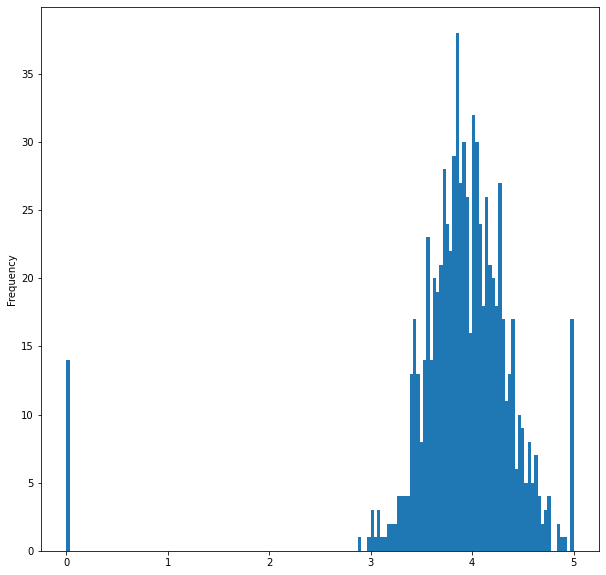

In [32]:
books_df['Avg_Rating'].plot.hist(bins=155, figsize=(10, 10))

The above vizualization is a Histogram of the Average ratings that the YA novels have recieved. We can see that majority of the Books lie in the rating of 3.5 to 4.5, and shows an overall normal distribution in this range. However, There are very few books with a rating of 0 or 5. 


## Top 15 Books and Authors with Highest Number of Votes

In [34]:
book_votes = books_df.nlargest(15, ["Votes"])

In [55]:
book_votes["Book"] = book_votes['Title'] + " " +book_votes['Author']

In [57]:
book_votes


,Title,Author,Avg_Rating,All_Ratings,Votes,Scores,Image_Url,Book_Url,Author_Url,Book
0,"Rule of Wolves (King of Scars, #2)",Leigh Bardugo,4.41,85354.0,391.0,38340.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/36307674-rule-of-wolves,https://www.goodreads.com/author/show/4575289....,"Rule of Wolves (King of Scars, #2) Leigh Bardugo"
1,"Chain of Iron (The Last Hours, #2)",Cassandra Clare,4.47,47280.0,291.0,28446.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/17699855-chain-of-iron,https://www.goodreads.com/author/show/150038.C...,"Chain of Iron (The Last Hours, #2) Cassandra C..."
2,Lore,Alexandra Bracken,3.82,52885.0,222.0,21293.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53375824-lore,https://www.goodreads.com/author/show/2973783....,Lore Alexandra Bracken
3,"We Free the Stars (Sands of Arawiya, #2)",Hafsah Faizal,4.31,19622.0,203.0,19901.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/46223364-we-free-the-stars,https://www.goodreads.com/author/show/17276299...,"We Free the Stars (Sands of Arawiya, #2) Hafsa..."
4,"Wings of Ebony (Wings of Ebony, #1)",J. Elle,3.92,3626.0,172.0,16749.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/54304072-wings-of-ebony,https://www.goodreads.com/author/show/19322069...,"Wings of Ebony (Wings of Ebony, #1) J. Elle"
5,"A Vow So Bold and Deadly (Cursebreakers, #3)",Brigid Kemmerer,3.82,25056.0,165.0,16070.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53138253-a-vow-so-bold-and-deadly,https://www.goodreads.com/author/show/4629194....,"A Vow So Bold and Deadly (Cursebreakers, #3) B..."
6,"The Gilded Ones (The Gilded Ones, #1)",Namina Forna,4.03,27920.0,153.0,14565.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/40024121-the-gilded-ones,https://www.goodreads.com/author/show/17999114...,"The Gilded Ones (The Gilded Ones, #1) Namina F..."
7,"Gods & Monsters (Serpent & Dove, #3)",Shelby Mahurin,4.06,27200.0,149.0,14059.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/52535769-gods-monsters,https://www.goodreads.com/author/show/17999118...,"Gods & Monsters (Serpent & Dove, #3) Shelby Ma..."
8,"Namesake (Fable, #2)",Adrienne Young,4.09,28366.0,142.0,13617.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53138025-namesake,https://www.goodreads.com/author/show/16640489...,"Namesake (Fable, #2) Adrienne Young"
9,You'll Be the Death of Me,Karen M. McManus,3.80,24813.0,135.0,13098.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/56200366-you-ll-be-the-death-of-me,https://www.goodreads.com/author/show/15127507...,You'll Be the Death of Me Karen M. McManus


Text(0, 0.5, 'Book')

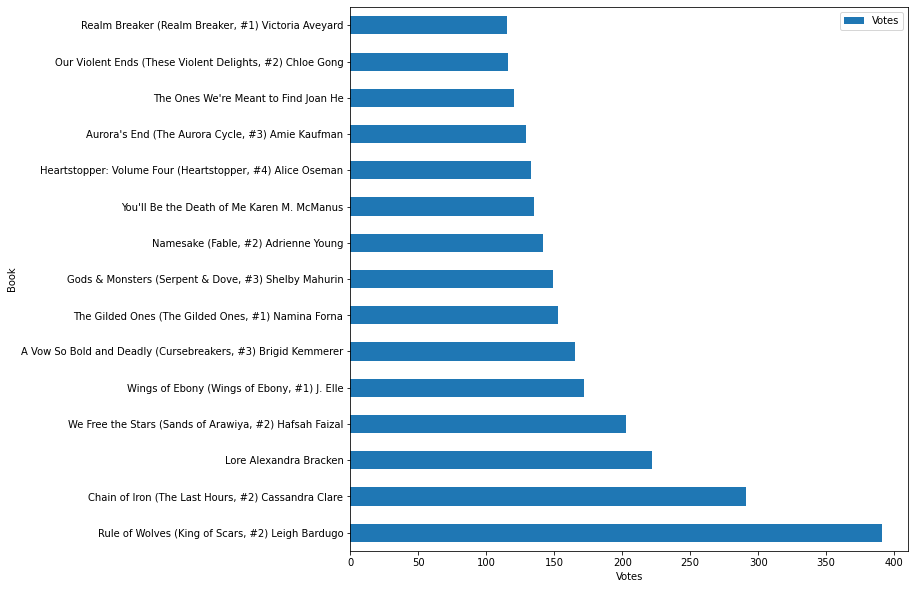

In [63]:
book_votes.plot(y="Votes", x="Book", kind="barh",  figsize=(10, 10))
plt.xlabel('Votes')
plt.ylabel("Book")

The above vizualization shows the top 15 Books which has receieved highest number of votes to be part of the List of "YA Novels of 2021". We can see that the book "Rule of Wolves (King of Scars, #2) by Leigh Bardugo" has been a favourite with about 391 people voting it for it. The 2nd Book "Chain of Iron ( The last Hours, #2)" by Cassandra Clare is second most voted with 291 votes.



## Top 15 Books and Authors with Highest Scores

In [37]:
books_high_score = books_df.nlargest(15, ["Scores"])

In [59]:
books_high_score["Book"] = books_high_score['Title'] + " " +books_high_score['Author']

In [60]:
books_high_score

,Title,Author,Avg_Rating,All_Ratings,Votes,Scores,Image_Url,Book_Url,Author_Url,Book
0,"Rule of Wolves (King of Scars, #2)",Leigh Bardugo,4.41,85354.0,391.0,38340.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/36307674-rule-of-wolves,https://www.goodreads.com/author/show/4575289....,"Rule of Wolves (King of Scars, #2) Leigh Bardugo"
1,"Chain of Iron (The Last Hours, #2)",Cassandra Clare,4.47,47280.0,291.0,28446.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/17699855-chain-of-iron,https://www.goodreads.com/author/show/150038.C...,"Chain of Iron (The Last Hours, #2) Cassandra C..."
2,Lore,Alexandra Bracken,3.82,52885.0,222.0,21293.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53375824-lore,https://www.goodreads.com/author/show/2973783....,Lore Alexandra Bracken
3,"We Free the Stars (Sands of Arawiya, #2)",Hafsah Faizal,4.31,19622.0,203.0,19901.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/46223364-we-free-the-stars,https://www.goodreads.com/author/show/17276299...,"We Free the Stars (Sands of Arawiya, #2) Hafsa..."
4,"Wings of Ebony (Wings of Ebony, #1)",J. Elle,3.92,3626.0,172.0,16749.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/54304072-wings-of-ebony,https://www.goodreads.com/author/show/19322069...,"Wings of Ebony (Wings of Ebony, #1) J. Elle"
5,"A Vow So Bold and Deadly (Cursebreakers, #3)",Brigid Kemmerer,3.82,25056.0,165.0,16070.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53138253-a-vow-so-bold-and-deadly,https://www.goodreads.com/author/show/4629194....,"A Vow So Bold and Deadly (Cursebreakers, #3) B..."
6,"The Gilded Ones (The Gilded Ones, #1)",Namina Forna,4.03,27920.0,153.0,14565.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/40024121-the-gilded-ones,https://www.goodreads.com/author/show/17999114...,"The Gilded Ones (The Gilded Ones, #1) Namina F..."
7,"Gods & Monsters (Serpent & Dove, #3)",Shelby Mahurin,4.06,27200.0,149.0,14059.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/52535769-gods-monsters,https://www.goodreads.com/author/show/17999118...,"Gods & Monsters (Serpent & Dove, #3) Shelby Ma..."
8,"Namesake (Fable, #2)",Adrienne Young,4.09,28366.0,142.0,13617.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/53138025-namesake,https://www.goodreads.com/author/show/16640489...,"Namesake (Fable, #2) Adrienne Young"
9,You'll Be the Death of Me,Karen M. McManus,3.80,24813.0,135.0,13098.0,https://i.gr-assets.com/images/S/compressed.ph...,/book/show/56200366-you-ll-be-the-death-of-me,https://www.goodreads.com/author/show/15127507...,You'll Be the Death of Me Karen M. McManus


Text(0, 0.5, 'Book')

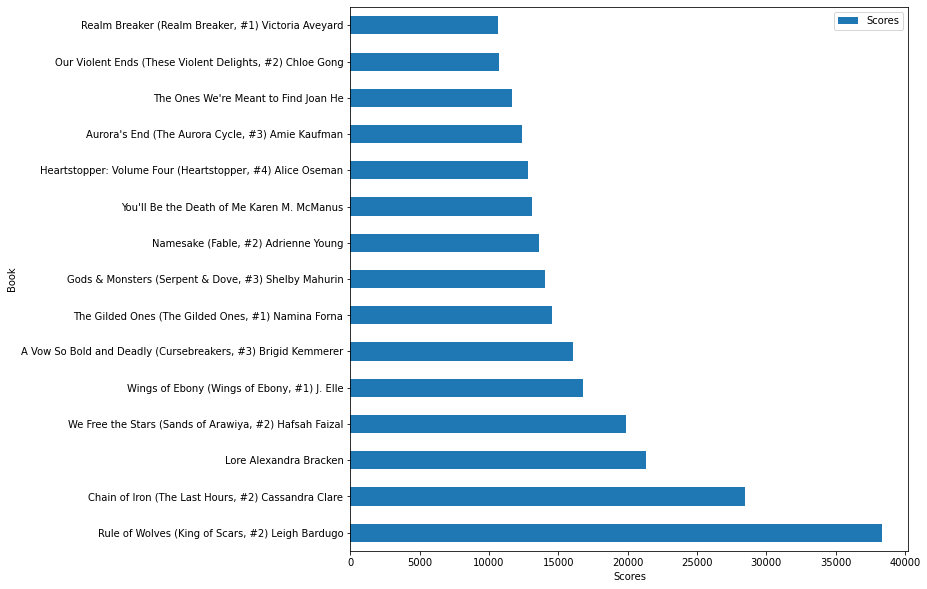

In [62]:
books_high_score.plot(y="Scores", x="Book", kind="barh",  figsize=(10, 10))
plt.xlabel('Scores')
plt.ylabel("Book")

A book’s total score is based on multiple factors, including the number of people who have voted for it and how highly those voters ranked the book. -- Definition of Score provided by GoodReads.


The above vizualization shows the top 15 Books which has receieved highest scores to be part of the List of "YA Novels of 2021". We can see that the book "Rule of Wolves (King of Scars, #2) by Leigh Bardugo has been a favourite with about score of 38340. The 2nd Book "Chain of Iron ( The last Hours, #2)" by Cassandra Clare has a score of 28446, we can conclude by this score that the First book was a favourite by a significant margin.

References:

https://beautiful-soup-4.readthedocs.io/en/latest/

https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html#user-guide

https://www.goodreads.com/list/show/113013.YA_Novels_of_2021